In [2]:
%matplotlib inline  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
path = "D:\\Documents\\JupyterNB\\tese_fgv\\dados"
dir_output = "D:\\Documents\\JupyterNB\\tese_fgv\\dados\\dados_tratados\\"

## Para tratamento no nome dos arquivos

In [134]:
chkRename = False

if chkRename:

    # Remove the word 'historico' from name
    for filename in os.listdir(path):
        os.rename(os.path.join(path,filename),os.path.join(path,filename.replace('historico', '')))

    # Remove the char '-' from name
    for filename in os.listdir(path):
        os.rename(os.path.join(path,filename),os.path.join(path,filename.replace('-', '')))


## Importando os dados da planilha

A ideia aqui é criar um data frame em que as linhas sejam as observações e as colunas os vencimentos

In [14]:
# file = "D:\\Documents\\JupyterNB\\tese_fgv\\dados\\NTNB_2018.xls"
# file_output = file.split("\\")[-1].split(".")[0] + '.csv'

file = "D:\\Documents\\JupyterNB\\tese_fgv\\dados\\LTN_2018.xls"
file_output = file.split("\\")[-1].split(".")[0] + '.csv'

# Load spreadsheet
xl = pd.ExcelFile(file)

dfAll = [] # guarda todas as colunas do arquivo
dtVcto = [] # vetor com as datas de vencimento para cada sheet
date_format = '%d/%m/%Y'
# date_format = '%Y-%m-%d'
for i in range(0, len(xl.sheet_names)):
    # primeiro eu importo tudo e capturo o vencimento do bond
    df1 = xl.parse(i, header =0, index_col =0, parse_dates = True)
    dtVcto.append(df1.columns[0])
#     dtVcto.append(df1.columns[1].str)

    # depois eu importo excluindo a primeira linha e parseando as datas como index e uso o date_format como modelo da data
    df1 = xl.parse(i, header =1, index_col =0, parse_dates = True)
    
    # Corrige eventual formatação de data no index
    newList = []
    for idx in df1.index:
        if type(idx) != type('a'):
            idx = idx.strftime("%d/%m/%Y")
        newList.append((idx))
    df1.index = newList

    
#     df1.index = pd.to_datetime(df1.index, format=date_format)
    dfAll.append(df1)
    
# df utilizado para armazenar somente uma coluna 'PU Base Manhã', mas poderia ser outra
df = []
for i in range(0, len(dfAll)):
    df.append(dfAll[i]['PU Base Manhã'])
    df[i].name = str(dtVcto[i])
df3 = pd.concat(df, axis=1, sort=False)
# df3 = pd.merge(df[0], df[1], left_index=True, right_index=True)
# df3.head()
df3.index = pd.to_datetime(df3.index)
df3.index.name = 'Dia'
df3.head()

# Exporto num arquivo que será utilizado para calcular as taxas forwards por minimização
df3.to_csv(dir_output + file_output, encoding='utf-8')

print("Preços consolidados com sucesso!")

Preços consolidados com sucesso!


## Início da análise exploratória dos dados

In [6]:
len(df)

4

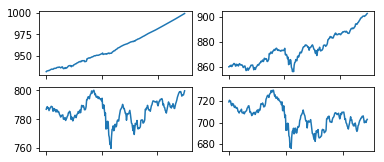

In [7]:
for i in range(0, len(df)):
    plt.subplot(len(df)/2 + 1, 2, i + 1)
    df[i].plot()

# plt.tight_layout()
plt.show()

In [8]:
df3.describe()
# print(df3['PUBaseManha_15082020'].describe())
# print(dfAll[0].describe())

,01/01/2014,01/01/2015,01/01/2016,01/01/2017
count,249.000000,251.000000,251.000000,243.00000
mean,960.865783,873.988725,786.120518,705.87823
std,19.322078,12.177493,7.571018,11.12922
min,932.570000,855.950000,759.980000,676.18000
25%,943.930000,862.455000,781.255000,698.64500
50%,957.390000,873.000000,786.710000,706.42000
75%,976.970000,883.795000,791.010000,712.90000
max,998.870000,902.610000,800.170000,730.31000


In [34]:
df3[df3['15/08/2020']==3192.630000]

,15/08/2020,15/08/2024,15/08/2026,15/05/2035,15/05/2045,15/08/2050
Dia,,,,,,
2018-02-15,3192.63,3249.28,3282.11,3386.17,3407.27,3390.56


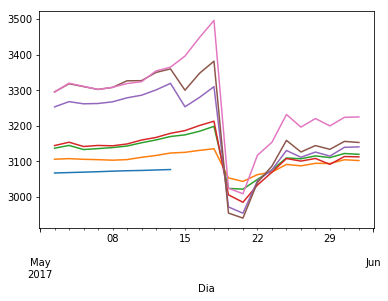

In [15]:
df3['2017-05'].plot(legend=None)
plt.show()